# Day 5: Prediction and Budget Visualization
**Objective:** Forecast customer acquisition based on given budgets and recommend budget allocation.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conversion_cac = pd.read_csv(r"C:\Users\Durga\Desktop\Career 2025\MeriSkill\Week1\conversion_cac.csv")
conversion_cac.head()
# Load conversion_cac from previous analysis


,AcquisitionSource,total_customers,total_transactions,total_cost,conversion_rate,CAC
0,Google-ads,16658,36085,1.151215e+07,0.461632,691.088182
1,Meta-ads,4731,5456,1.493116e+06,0.867119,315.602710
2,Yt-Campaign,4756,5492,1.438438e+06,0.865987,302.446990


In [15]:
# Set total marketing budget
total_budget = 50000

# Allocate equal budget to each acquisition source
conversion_cac['budget_allocated'] = total_budget / len(conversion_cac)

# Predict customers acquired = budget allocated / CAC
conversion_cac['predicted_customers'] = conversion_cac['budget_allocated'] / conversion_cac['CAC']

conversion_cac[['AcquisitionSource', 'budget_allocated', 'CAC', 'predicted_customers']]

,AcquisitionSource,budget_allocated,CAC,predicted_customers
0,Google-ads,16666.666667,691.088182,24.116556
1,Meta-ads,16666.666667,315.602710,52.809010
2,Yt-Campaign,16666.666667,302.446990,55.106075


C:\Users\Durga\AppData\Local\Temp\ipykernel_15456\1542778552.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcquisitionSource', y='predicted_customers', data=conversion_cac, palette='viridis')


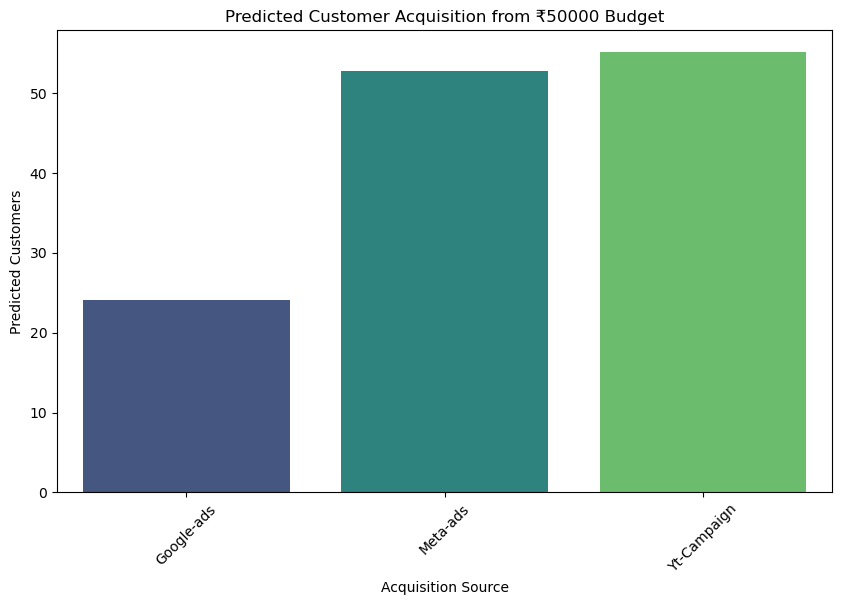

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='AcquisitionSource', y='predicted_customers', data=conversion_cac, palette='viridis')
plt.title(f'Predicted Customer Acquisition from ₹{total_budget} Budget')
plt.ylabel('Predicted Customers')
plt.xlabel('Acquisition Source')
plt.xticks(rotation=45)
plt.show()

## ✅ Insights and Recommendations:
- Based on an equal allocation of ₹50,000 budget, predicted customer acquisition for each campaign is shown above.
- Channels with the best efficiency (low CAC and high predicted customers) should receive prioritized investment in future campaigns.
- For even better results, consider allocating budget proportionally based on conversion rate and CAC performance.

In [21]:
# Create score based on inverse CAC and conversion rate
conversion_cac['inverse_CAC'] = 1 / conversion_cac['CAC']
conversion_cac['weight'] = (conversion_cac['conversion_rate'] * 0.6) + (conversion_cac['inverse_CAC'] * 0.4)

In [23]:
# Calculate weighted budget allocation
conversion_cac['weighted_budget'] = (conversion_cac['weight'] / conversion_cac['weight'].sum()) * total_budget

# Predict customers with weighted budget
conversion_cac['weighted_predicted_customers'] = conversion_cac['weighted_budget'] / conversion_cac['CAC']


In [25]:
comparison = conversion_cac[['AcquisitionSource', 'budget_allocated', 'predicted_customers', 
                             'weighted_budget', 'weighted_predicted_customers']]
comparison

,AcquisitionSource,budget_allocated,predicted_customers,weighted_budget,weighted_predicted_customers
0,Google-ads,16666.666667,24.116556,10513.474686,15.212928
1,Meta-ads,16666.666667,52.809010,19755.080687,62.594775
2,Yt-Campaign,16666.666667,55.106075,19731.444627,65.239349


C:\Users\Durga\AppData\Local\Temp\ipykernel_15456\2598786315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AcquisitionSource', y='weighted_predicted_customers', data=conversion_cac, palette='coolwarm')


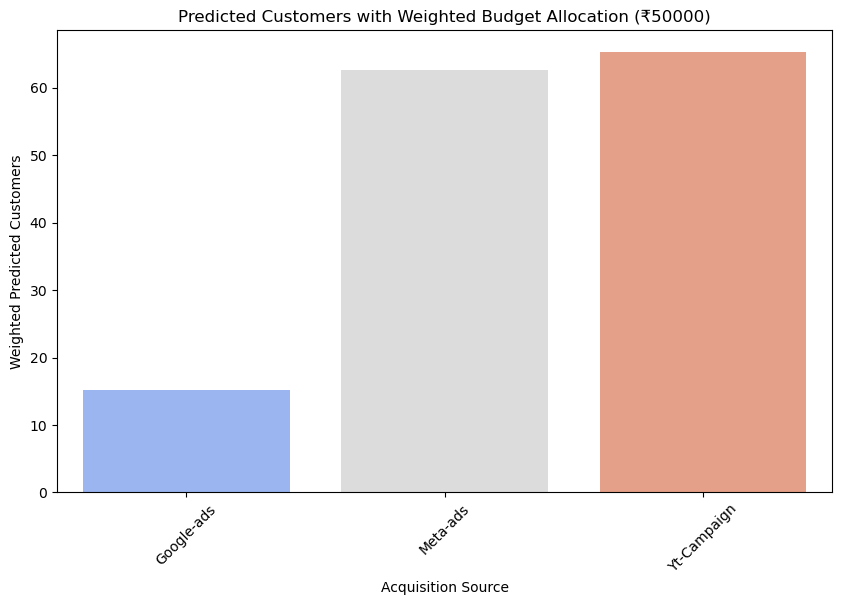

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='AcquisitionSource', y='weighted_predicted_customers', data=conversion_cac, palette='coolwarm')
plt.title(f'Predicted Customers with Weighted Budget Allocation (₹{total_budget})')
plt.ylabel('Weighted Predicted Customers')
plt.xlabel('Acquisition Source')
plt.xticks(rotation=45)
plt.show()

## ✅ Optimized Recommendation:
- Weighted budget allocation based on conversion rate and inverse CAC improves predicted customer acquisition.
- Channels with strong conversion efficiency (like **Meta-ads** and **Yt-Campaign**) are allocated a larger share of the budget.
- Recommend using weighted allocation for future marketing campaigns for maximum efficiency and ROI.

Additional : Comparison Bar chart

In [31]:
# Prepare data for clustered bar chart
comparison_melted = conversion_cac.melt(
    id_vars='AcquisitionSource',
    value_vars=['predicted_customers', 'weighted_predicted_customers'],
    var_name='Allocation_Type',
    value_name='Predicted_Customers'
)

# Clean up labels for readability
comparison_melted['Allocation_Type'] = comparison_melted['Allocation_Type'].map({
    'predicted_customers': 'Equal Allocation',
    'weighted_predicted_customers': 'Weighted Allocation'
})

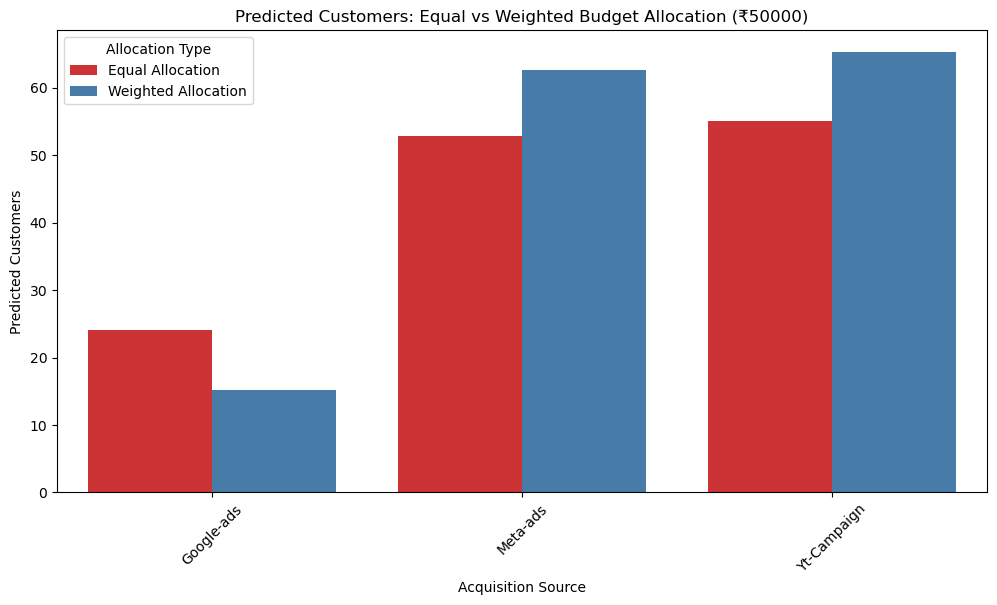

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=comparison_melted,
    x='AcquisitionSource',
    y='Predicted_Customers',
    hue='Allocation_Type',
    palette='Set1'
)

plt.title(f'Predicted Customers: Equal vs Weighted Budget Allocation (₹{total_budget})')
plt.xlabel('Acquisition Source')
plt.ylabel('Predicted Customers')
plt.xticks(rotation=45)
plt.legend(title='Allocation Type')
plt.show()